<a href="https://colab.research.google.com/github/SuryARavichan/PYTHON-FOR-DATA-SCIENCE-BDA-/blob/main/Linear_Regression_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from scipy import stats


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
A=pd.read_csv('/content/drive/My Drive/Regression Models_Mahesh Anand/housing.csv',index_col=0)
A.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


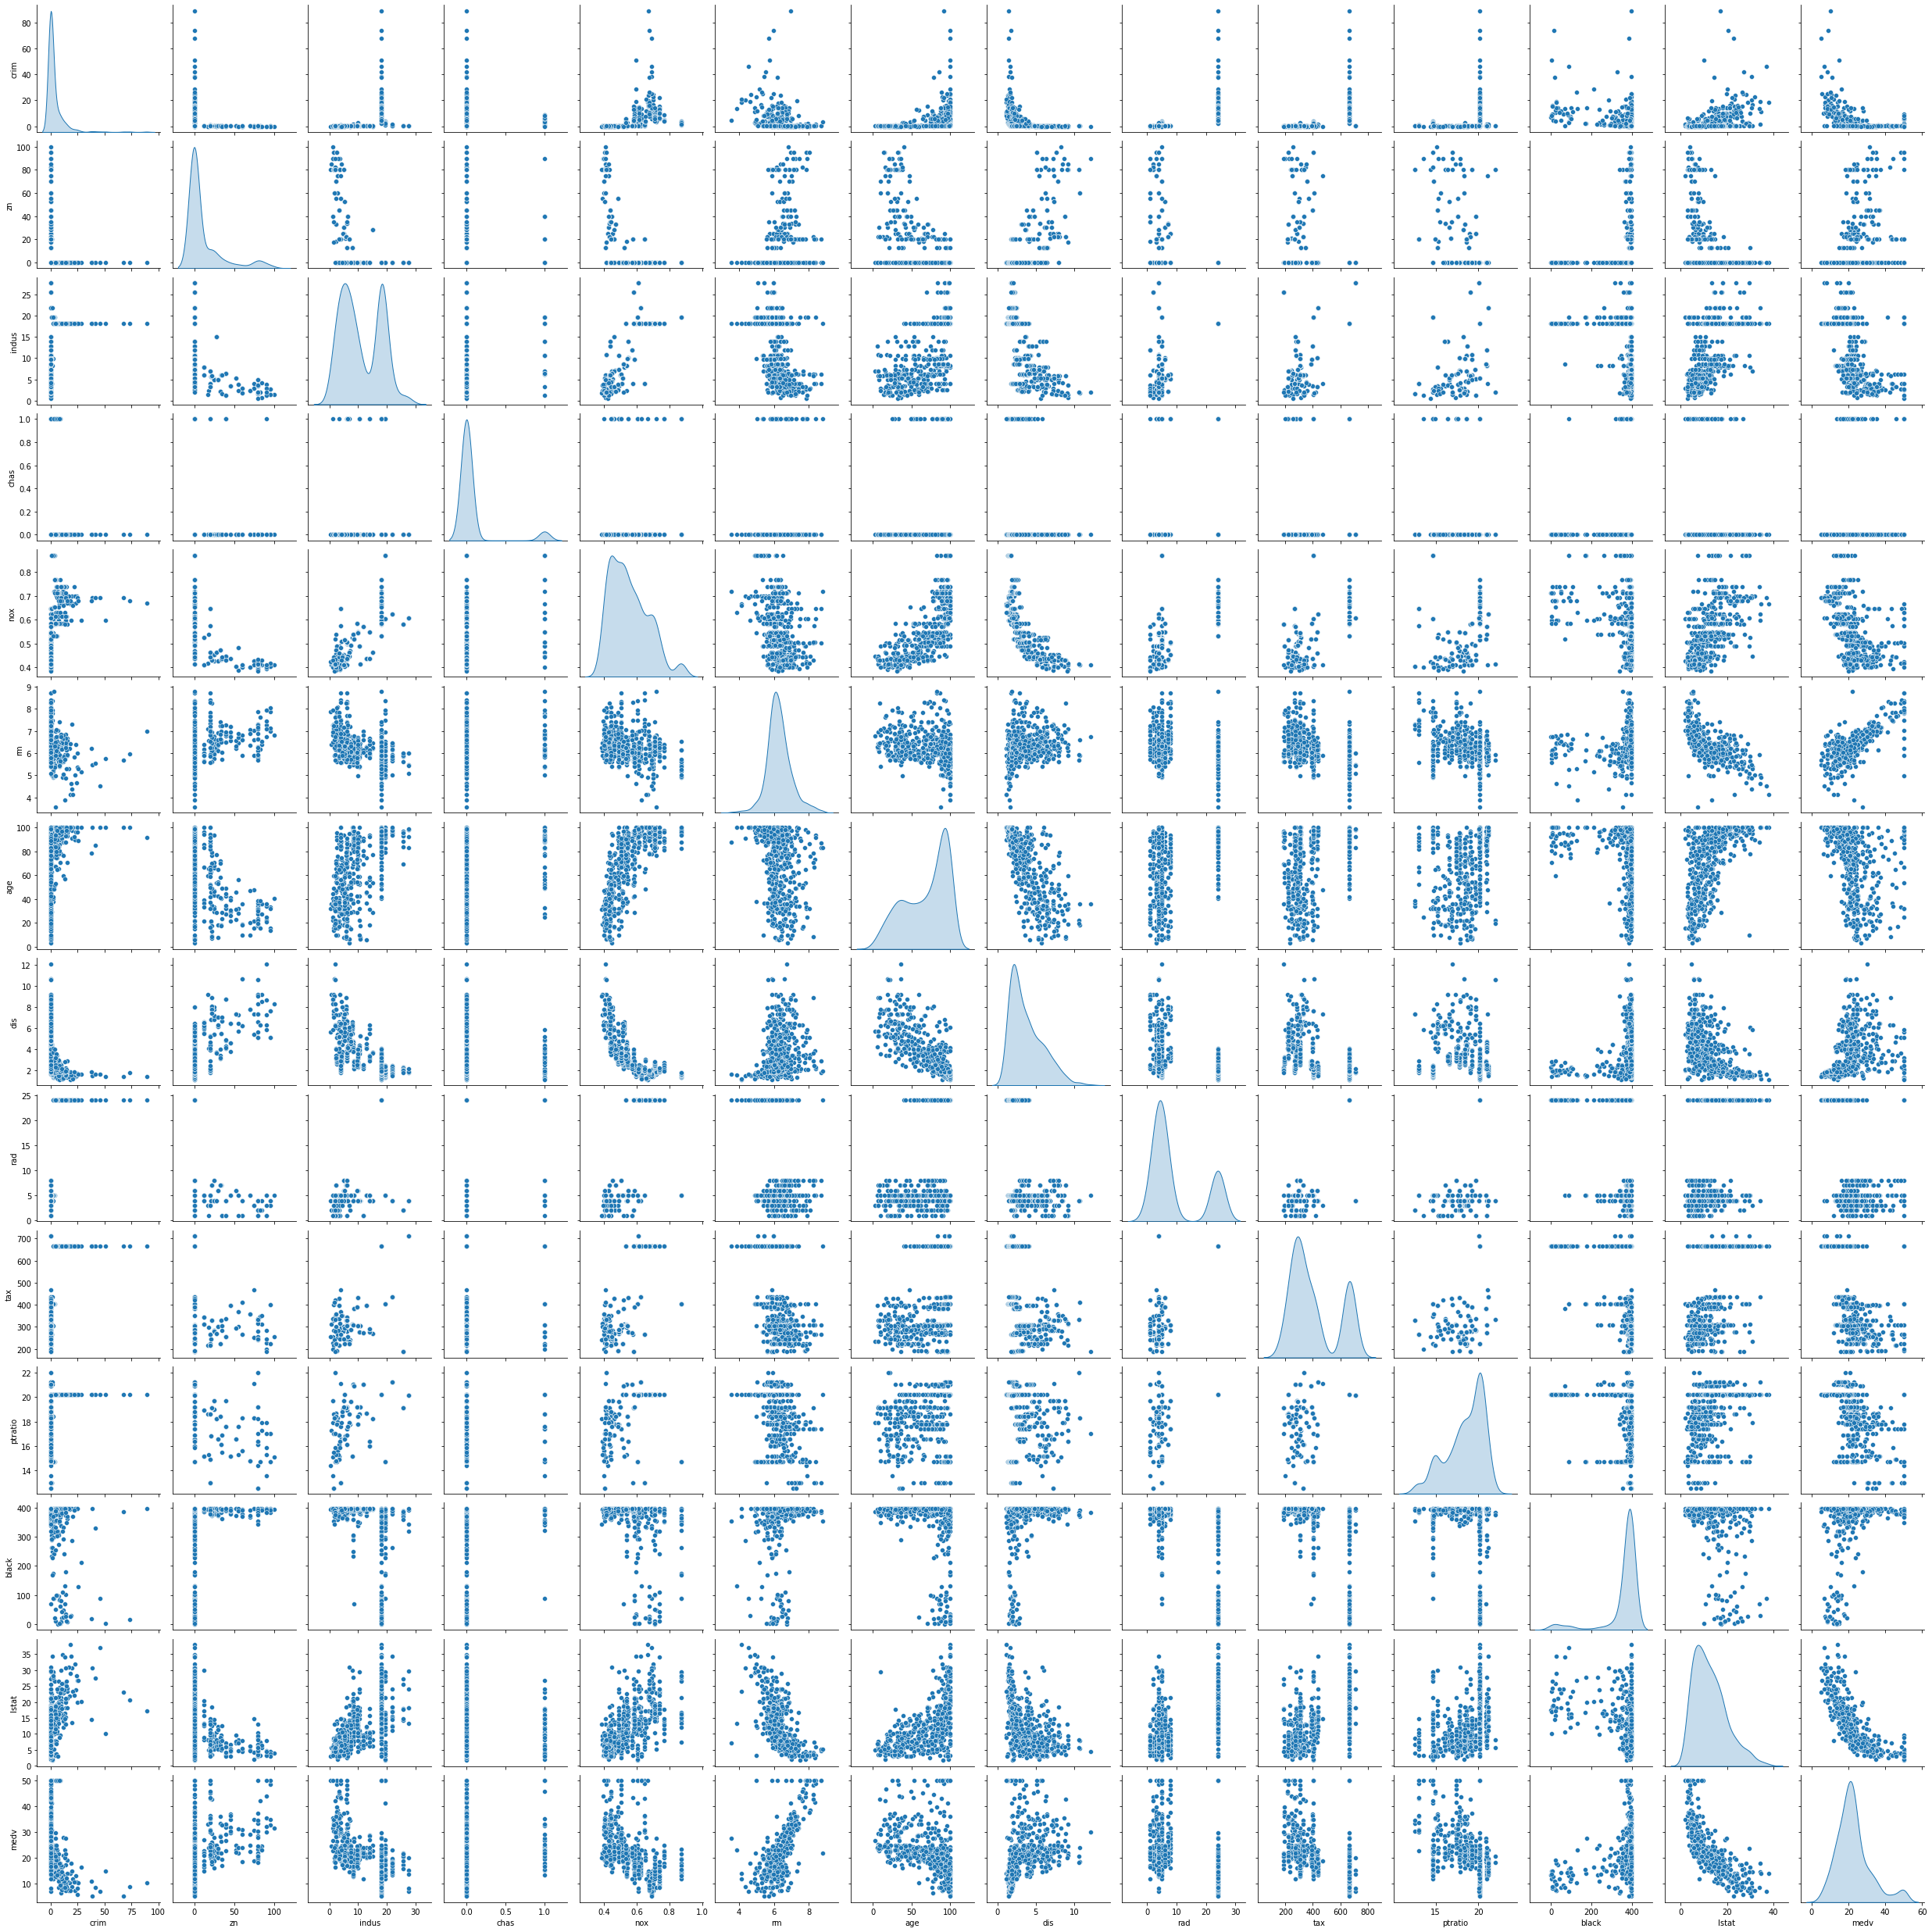

In [ ]:
sns.pairplot(A,diag_kind='kde')

In [ ]:
A.skew()

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
black     -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

In [ ]:
A['crim'],lamb=stats.boxcox(A['crim'])

In [ ]:
A['crim']=np.log(A['crim'])

In [ ]:
A['crim'].skew()

0.4059344988496048

In [ ]:
lamb

-0.1135346104820464

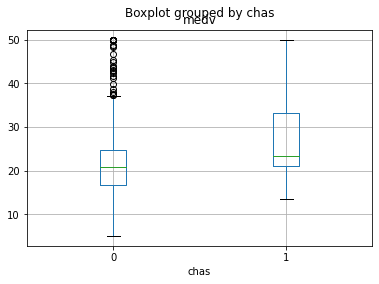

In [ ]:
#How do you decide charles river factor influence the property price or not?
#Give your visual insights along with your statistical evidence.
A.boxplot(column='medv',by='chas')

In [ ]:
#Two -sample mean test
from scipy.stats import ttest_ind,levene

In [ ]:
levene(A['medv'],A['tax'])

LeveneResult(statistic=518.122121690786, pvalue=6.548989933002059e-93)

In [ ]:
levene(A['medv'],A['indus'])

LeveneResult(statistic=2.1197336249113743, pvalue=0.1457225947720034)

In [ ]:
g1=A[A['chas']==0]['medv']
g2=A[A['chas']==1]['medv']


In [ ]:
levene(A['medv'],A['indus'])

LeveneResult(statistic=2.1197336249113743, pvalue=0.1457225947720034)

In [ ]:
ttest_ind(g1,g2)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [ ]:
A.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
import statsmodels.api as sm

In [ ]:
x=A.drop(['medv'],axis=1)
Y=A['medv']

In [ ]:
#Feature Transformations
x['crim'],_=stats.boxcox(x['crim'])
x['nox']=np.log(x['nox'])
x['dis']=np.log(x['dis'])
x['rad']=np.log(x['rad'])
x['tax']=np.log(x['tax'])
x['ptratio'],_=stats.boxcox(x['ptratio'])
x['black'],_=stats.boxcox(x['black'])
x['lstat'],_=stats.boxcox(x['lstat'])
x['age'],_=stats.boxcox(x['age'])


In [ ]:
xc=sm.add_constant(x)
model=sm.OLS(Y,xc).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        06:42:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
res=model_with_9f.resid
res.skew()

1.5275347747793497

In [ ]:
A.shape

(506, 14)

In [ ]:
#We could observe the 

In [ ]:
#Feature selection by recursive backward elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = x[cols]
    xc = sm.add_constant(X)
    model = sm.OLS(Y,xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [ ]:
X_final=A[selected_features_BE]
X_final.shape

(506, 11)

In [ ]:
X_final_c=sm.add_constant(X_final)
model_with_9f=sm.OLS(Y,X_final_c).fit()
model_with_9f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          5.54e-137
Time:                        06:46:42   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
A.shape

(506, 14)

In [ ]:
LR=LinearRegression()
kf=KFold(n_splits=5,shuffle=True,random_state=0)
scores=cross_val_score(LR,X_final,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias Error',np.mean(np.abs(scores)))
print('Var Error',np.std(np.abs(scores),ddof=1))

Bias Error 4.8286403763869545
Var Error 0.7343274861469683


In [ ]:
X_final.head()

,crim,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
x.shape

(506, 13)

In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
Rd=Ridge(alpha=0.5,normalize=True)
Ls=Lasso(alpha=0.1,normalize=True)
En=ElasticNet(alpha=0.01,l1_ratio=0.919,normalize=True)


In [ ]:
from sklearn.model_selection import GridSearchCV
param={'alpha':np.arange(0.01,1,0.01),'l1_ratio':np.arange(0.1,1,0.01)}


In [ ]:
GS=GridSearchCV(En,param,cv=5)


In [ ]:
GS.fit(x,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.919, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0...
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])},
             pre_dispatch='2*n_jobs', refit=True

In [ ]:
GS.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9199999999999996}

In [ ]:
models = []
models.append(('Ridge',Rd))
models.append(('Lasso',Ls))
models.append(('Elastic',En))

Ridge: 5.218396 (0.893729)
Lasso: 5.874592 (0.643972)
Elastic: 5.202181 (0.874634)


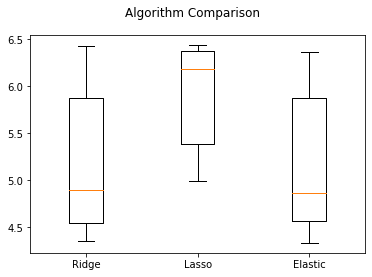

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = cross_val_score(model, x, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_QR=x[['lstat','ptratio','rm']] #Picking the features with curvilinear/non-linear relationship

In [ ]:
X_QR.head()

,lstat,ptratio,rm
1,4.98,15.3,6.575
2,9.14,17.8,6.421
3,4.03,17.8,7.185
4,2.94,18.7,6.998
5,5.33,18.7,7.147


In [ ]:
X_QR.shape

(506, 3)

In [ ]:
#Quadratic Regression Model
qr=PolynomialFeatures(degree=2)
x_qr=qr.fit_transform(X_QR)


In [ ]:
type(x_qr)

numpy.ndarray

In [ ]:
x_qr_df=pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,4.98,15.3,6.575,24.8004,76.194,32.74350,234.09,100.5975,43.230625
1,1.0,9.14,17.8,6.421,83.5396,162.692,58.68794,316.84,114.2938,41.229241
2,1.0,4.03,17.8,7.185,16.2409,71.734,28.95555,316.84,127.8930,51.624225
3,1.0,2.94,18.7,6.998,8.6436,54.978,20.57412,349.69,130.8626,48.972004
4,1.0,5.33,18.7,7.147,28.4089,99.671,38.09351,349.69,133.6489,51.079609


In [ ]:
x_qr_df=x_qr_df.drop(0,axis=1)

In [ ]:
x_qr_df.head()

,1,2,3,4,5,6,7,8,9
0,4.98,15.3,6.575,24.8004,76.194,32.74350,234.09,100.5975,43.230625
1,9.14,17.8,6.421,83.5396,162.692,58.68794,316.84,114.2938,41.229241
2,4.03,17.8,7.185,16.2409,71.734,28.95555,316.84,127.8930,51.624225
3,2.94,18.7,6.998,8.6436,54.978,20.57412,349.69,130.8626,48.972004
4,5.33,18.7,7.147,28.4089,99.671,38.09351,349.69,133.6489,51.079609


In [ ]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
x_qr_df.shape

(506, 9)

In [ ]:
idx=np.arange(x.shape[0])


In [ ]:
Y.index=idx

In [ ]:
x.index=idx

In [ ]:
x_qr_df=pd.concat([x,x_qr_df,Y],axis=1)

In [ ]:
x_qr_df.shape

(506, 30)

In [ ]:
x_qr_df.drop(['lstat','ptratio','rm'],axis=1,inplace=True)

In [ ]:
x_qr_df.head()

,crim,zn,indus,chas,nox,age,dis,rad,tax,black,1,2,3,4,5,6,7,8,9,medv
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,396.90,4.98,15.3,6.575,24.8004,76.194,32.74350,234.09,100.5975,43.230625,24.0
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242,396.90,9.14,17.8,6.421,83.5396,162.692,58.68794,316.84,114.2938,41.229241,21.6
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242,392.83,4.03,17.8,7.185,16.2409,71.734,28.95555,316.84,127.8930,51.624225,34.7
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222,394.63,2.94,18.7,6.998,8.6436,54.978,20.57412,349.69,130.8626,48.972004,33.4
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222,396.90,5.33,18.7,7.147,28.4089,99.671,38.09351,349.69,133.6489,51.079609,36.2


In [ ]:
x_qr_df.columns=['crim','zn','indus','chas','nox','age','dis','rad','tax','black','f1','f2','f3','f4','f5','f6','f7','f8','f9','medv']


In [ ]:
x_qr_df1=x_qr_df.drop('medv',axis=1)

In [ ]:
x_qr_df1_c=sm.add_constant(x_qr_df1)

In [ ]:
model_with_fe=sm.OLS(Y,x_qr_df1_c).fit()

In [ ]:
model_with_fe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     133.7
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.21e-179
Time:                        07:23:26   Log-Likelihood:                -1377.5
No. Observations:                 506   AIC:                             2795.
Df Residuals:                     486   BIC:                             2880.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.2868     37.870     -2.490      0.013    -168.696     -19.878
crim          -0.1467      0.026     -5.563      0.000      -0.198      -0.095
zn             0.0200      0.012      1.732      0.084      -0.003       0.043
indus          0.1024      0.049      2.087      0.037       0.006       0.199
chas           2.3705      0.691      3.433      0.001       1.014       3.727
nox          -17.9518      3.521     -5.098      0.000     -24.871     -11.033
age            0.0095      0.011      0.870      0.385      -0.012       0.031
dis           -1.0479      0.166     -6.325      0.000      -1.373      -0.722
rad            0.2583      0.055      4.722      0.000       0.151       0.366
tax           -0.0089      0.003     -2.936      0.003      -0.015      -0.003
black          0.0046      0.002      2.075      0.038       0.000       0.009
f1             1.2644      0.551      2.296      0.022       0.182       2.346
f2             8.1516      2.486      3.279      0.001       3.266      13.037
f3            14.5893      5.710      2.555      0.011       3.370      25.809
f4             0.0196      0.004      4.450      0.000       0.011       0.028
f5            -0.1011      0.018     -5.708      0.000      -0.136      -0.066
f6            -0.1015      0.057     -1.789      0.074      -0.213       0.010
f7            -0.0134      0.049     -0.272      0.786      -0.110       0.083
f8            -1.1315      0.167     -6.791      0.000      -1.459      -0.804
f9             0.8396      0.279      3.013      0.003       0.292       1.387
==============================================================================
Omnibus:                      201.053   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1934.820
Skew:                           1.455   Prob(JB):                         0.00
Kurtosis:                      12.127   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#m9=smf.ols('medv~crim+zn+indus+chas+nox+age+dis+rad+tax+black+f1+f2+f3+f4+f5+f6+f7+f8+f9',x_qr_df).fit()

In [ ]:
#m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     133.7
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.21e-179
Time:                        07:08:56   Log-Likelihood:                -1377.5
No. Observations:                 506   AIC:                             2795.
Df Residuals:                     486   BIC:                             2880.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -94.2868     37.870     -2.490      0.013    -168.696     -19.878
crim          -0.1467      0.026     -5.563      0.000      -0.198      -0.095
zn             0.0200      0.012      1.732      0.084      -0.003       0.043
indus          0.1024      0.049      2.087      0.037       0.006       0.199
chas           2.3705      0.691      3.433      0.001       1.014       3.727
nox          -17.9518      3.521     -5.098      0.000     -24.871     -11.033
age            0.0095      0.011      0.870      0.385      -0.012       0.031
dis           -1.0479      0.166     -6.325      0.000      -1.373      -0.722
rad            0.2583      0.055      4.722      0.000       0.151       0.366
tax           -0.0089      0.003     -2.936      0.003      -0.015      -0.003
black          0.0046      0.002      2.075      0.038       0.000       0.009
f1             1.2644      0.551      2.296      0.022       0.182       2.346
f2             8.1516      2.486      3.279      0.001       3.266      13.037
f3            14.5893      5.710      2.555      0.011       3.370      25.809
f4             0.0196      0.004      4.450      0.000       0.011       0.028
f5            -0.1011      0.018     -5.708      0.000      -0.136      -0.066
f6            -0.1015      0.057     -1.789      0.074      -0.213       0.010
f7            -0.0134      0.049     -0.272      0.786      -0.110       0.083
f8            -1.1315      0.167     -6.791      0.000      -1.459      -0.804
f9             0.8396      0.279      3.013      0.003       0.292       1.387
==============================================================================
Omnibus:                      201.053   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1934.820
Skew:                           1.455   Prob(JB):                         0.00
Kurtosis:                      12.127   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_qr_df.drop(['zn','age','f6','f7'],axis=1,inplace=True)

In [ ]:
X_QR_final=x_qr_df.drop(['medv'],axis=1)
qr=LinearRegression()

In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
scores=cross_val_score(qr,X_QR_final,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias Error',np.mean(np.abs(scores)))
print('Var Error',np.std(np.abs(scores),ddof=1))

Bias Error 3.945645680627462
Var Error 0.6636052942882994


In [ ]:
X_QR_final.shape

(506, 15)

In [ ]:
models = []
models.append(('QuadraticRegression', qr))
models.append(('Ridge',Rd))
models.append(('Lasso',Ls))
models.append(('Elastic',En))


QuadraticRegression: 3.945646 (0.663605)
Ridge: 5.034322 (0.859465)
Lasso: 5.719850 (0.595831)
Elastic: 5.051907 (0.847238)


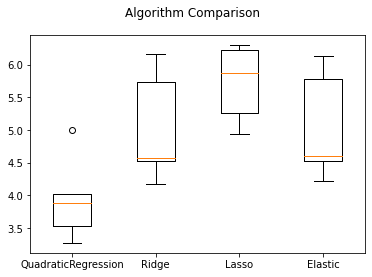

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = cross_val_score(model, X_QR_final, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
(0.663605-0.595831)/0.663605

0.10213003217275338

In [ ]:
(5.719850-3.945646)/5.719850

0.3101836586623775

In [ ]:
#BE:4.352 , VE:0.768 (with only f1 to f9)
#LR:BE: 4.828,VE:0.702
#QR: BE: 3.952, VE: 0.687